Load libraries and dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


## Loding dataset

In [60]:
df_raw = pd.read_csv("../data/raw/Cereal_crops.csv")
df_raw.head()

#removing unamed column
# Clean data
df_clean = df_raw.loc[:, ~df_raw.columns.str.contains('^Unnamed')]
df_clean = df_clean.drop(columns=["No."])


# Save cleaned version to 'processed/' folder
df_clean.to_csv('../data/processed/crop_clean.csv', index=False)

# 4. Use cleaned version going forward
df = pd.read_csv('../data/processed/crop_clean.csv')
df.head()

,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Crop Type,Crop Species,Yield (q/ha)
0,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,730-1300,1750-2500,98-112,Teff,Acc 236756-3 (Bir Adama),16-18
1,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,700-1300,1700-2600,104-128,Teff,DZ-Cr-551 RIL173 (Bereket),2.0-2.7
2,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,700-1300,1700-2600,115-130,Teff,DZ-Cr-542 RIL106 (Kulie),2.0-2.3
3,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,1800-200,1750-2250,111-128,Teff,DZ-Cr-456 RIL76B (Jarso),2.3
4,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,800-1300,1700-2400,93-113,Teff,DZ-Cr-459 RIL 104 (Takusa),17-21


In [61]:
# cheking Columns recognized as datetime
date_cols = df.select_dtypes(include=['datetime', 'datetime64[ns]']).columns
print("Datetime columns:", list(date_cols))


Datetime columns: []


In [62]:

# Detect cells containing non-ASCII characters
non_english = df.astype(str).apply(
    lambda col: col.str.contains(r'[^\x00-\x7F]', regex=True, na=False)
)

rows_with_non_english = df[non_english.any(axis=1)]
rows_with_non_english.head()



,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Crop Type,Crop Species,Yield (q/ha)


In [63]:
# Missing values per column
print(df.isnull().sum())

# Total missing values
print("Total missing values:", df.isnull().sum().sum())


N (kg/ha)       0
P (kg/ha)       0
K (kg/ha)       0
T (°C)          0
PH              0
RF (mm)         0
Altitude (m)    0
LGP             0
Crop Type       0
Crop Species    0
Yield (q/ha)    0
dtype: int64
Total missing values: 0


## Basic dataset inspection

In [64]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   N (kg/ha)     288 non-null    str  
 1   P (kg/ha)     288 non-null    str  
 2   K (kg/ha)     288 non-null    str  
 3   T (°C)        288 non-null    str  
 4   PH            288 non-null    str  
 5   RF (mm)       288 non-null    str  
 6   Altitude (m)  288 non-null    str  
 7   LGP           288 non-null    str  
 8   Crop Type     288 non-null    str  
 9   Crop Species  288 non-null    str  
 10  Yield (q/ha)  288 non-null    str  
dtypes: str(11)
memory usage: 47.3 KB


,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Crop Type,Crop Species,Yield (q/ha)
count,288,288,288,288,288,288,288,288,288,288,288
unique,5,4,5,5,4,75,104,168,5,276,210
top,92 - 138,10.0-30.0,15 - 18,15 - 25,5.5 - 7.5,250-1170,1000-1600,145,Wheat,Pavn-76,55-65
freq,95,138,95,95,146,54,31,13,95,2,9


## Separate numeric range and categorical columns

In [65]:
range_columns = [
    "N (kg/ha)", "P (kg/ha)", "K (kg/ha)", "T (°C)",
    "PH", "RF (mm)", "Altitude (m)", "LGP", "Yield (q/ha)"
]

categorical_columns = [
    "Crop Type", "Crop Species"
]

df[range_columns + categorical_columns].head()


,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Yield (q/ha),Crop Type,Crop Species
0,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,730-1300,1750-2500,98-112,16-18,Teff,Acc 236756-3 (Bir Adama)
1,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,700-1300,1700-2600,104-128,2.0-2.7,Teff,DZ-Cr-551 RIL173 (Bereket)
2,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,700-1300,1700-2600,115-130,2.0-2.3,Teff,DZ-Cr-542 RIL106 (Kulie)
3,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,1800-200,1750-2250,111-128,2.3,Teff,DZ-Cr-456 RIL76B (Jarso)
4,69 - 92,10.0-30.0,15 - 30,10.0-27.0,5.5 - 7.0,800-1300,1700-2400,93-113,17-21,Teff,DZ-Cr-459 RIL 104 (Takusa)


## Univariate analysis of categorical variables

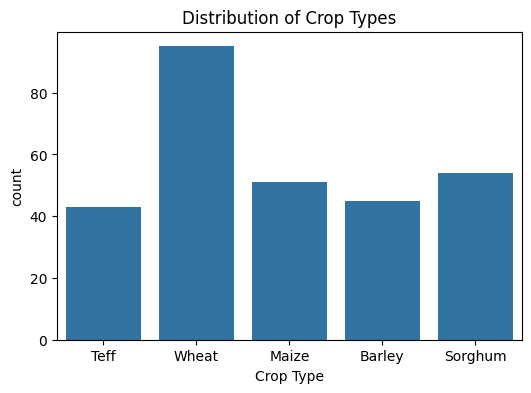

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Crop Type")
plt.title("Distribution of Crop Types")
plt.show()


## Visualize range distributions (midpoint approximation)

In [67]:
def range_midpoint(value):
    if isinstance(value, str) and "-" in value:
        low, high = value.replace(" ", "").split("-")
        return (float(low) + float(high)) / 2
    return np.nan

df_mid = df.copy()

for col in range_columns:
    df_mid[col] = df[col].apply(range_midpoint)

df_mid[range_columns].head()


ValueError: too many values to unpack (expected 2)

## Univariate distribution plots (soil & climate)

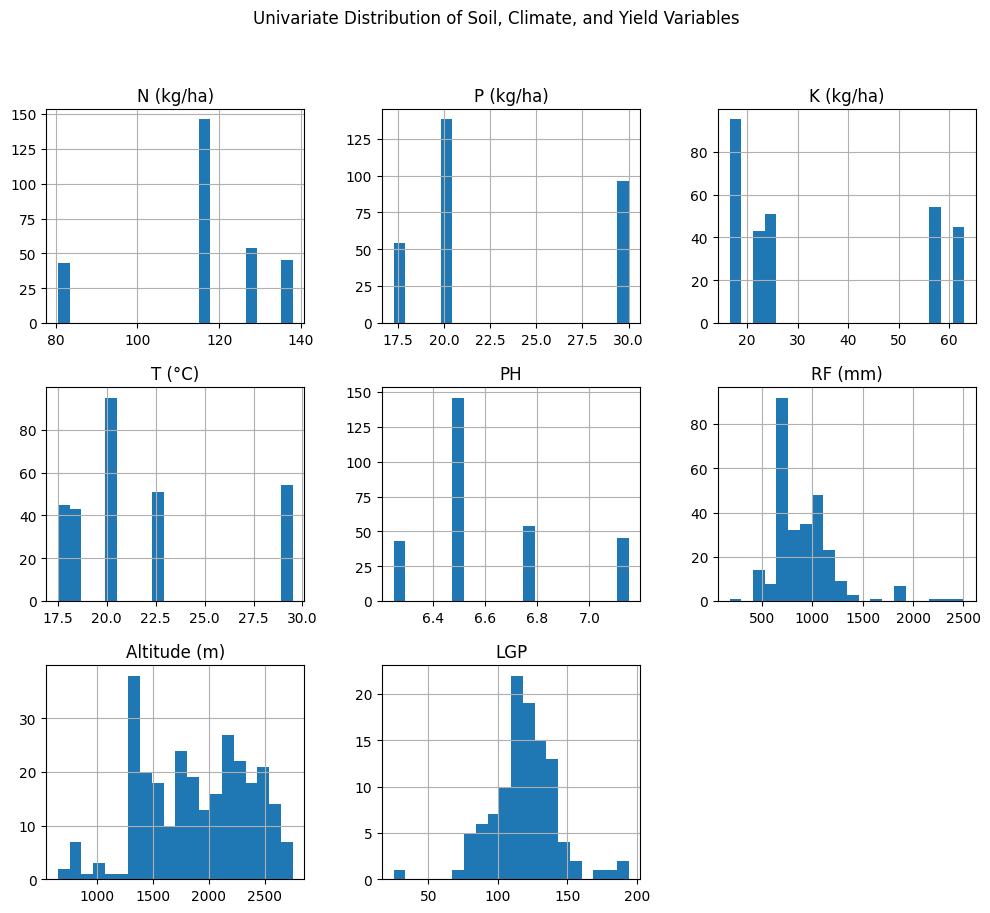

In [68]:
df_mid[range_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle("Univariate Distribution of Soil, Climate, and Yield Variables")
plt.show()


## Crop-wise suitability patterns

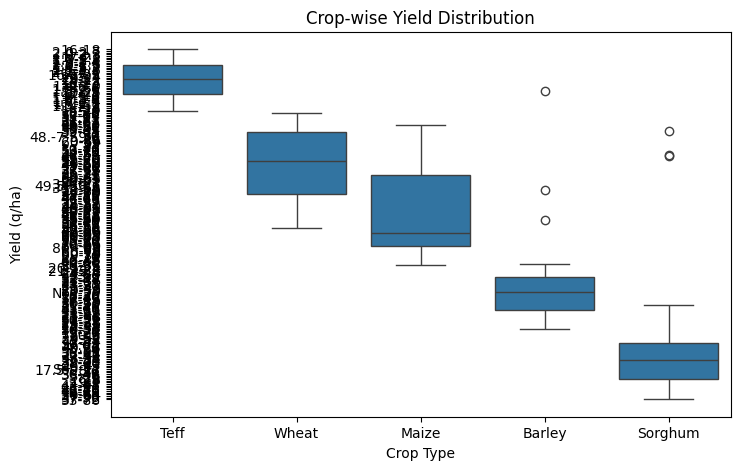

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_mid, x="Crop Type", y="Yield (q/ha)")
plt.title("Crop-wise Yield Distribution")
plt.show()


## Correlation analysis (soil climate yield)

In [70]:
corr = df_mid[range_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Soil, Climate, and Yield")
plt.show()



ValueError: could not convert string to float: '16-18'

## Identify outliers and inconsistencies

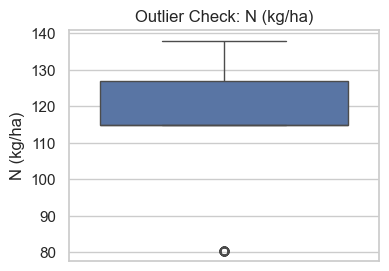

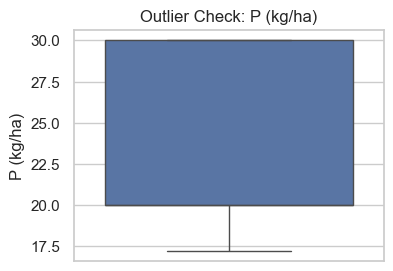

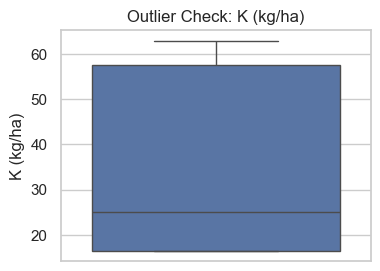

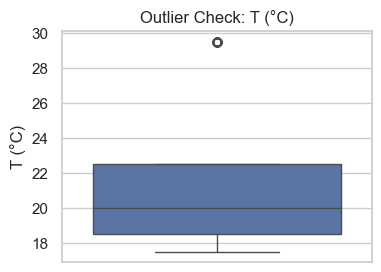

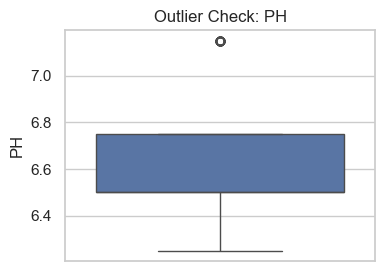

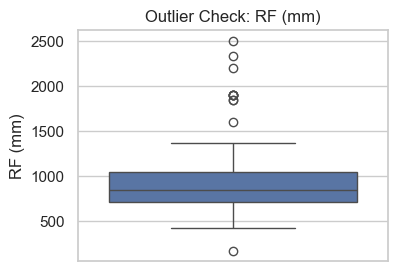

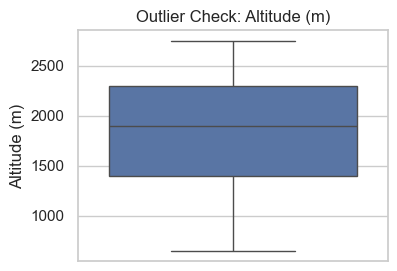

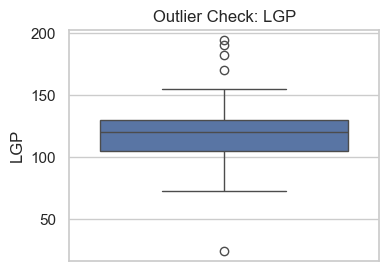

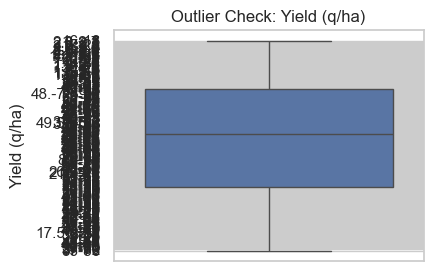

In [33]:
for col in range_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=df_mid[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()
